In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hide_image(cover, secret):
    # Resize the secret image to match the cover image dimensions
    secret = cv2.resize(secret, (cover.shape[1], cover.shape[0]))
    
    # Clear the 4 least significant bits
    cover = cover & 0b11110000
    # Shift the 4 most significant bits to less significant positions
    secret = secret >> 4         
    
    # Hide the secret image
    stego = cover | secret

    return stego

def reveal_image(stego):  
    # Extract the secret image
    # Extract the least significant bits and shift them
    secret = (stego & 0b00001111) << 4  
    return secret

In [8]:
cover_path = './images/inpainting.png'
secret_path = './images/plane.PNG'

In [9]:
cover = cv2.imread(cover_path)
cover = cv2.cvtColor(cover, cv2.COLOR_RGB2BGR)
secret = cv2.imread(secret_path)
secret = cv2.cvtColor(secret, cv2.COLOR_RGB2BGR)

In [10]:
stego = hide_image(cover, secret)
secret_out = reveal_image(stego)

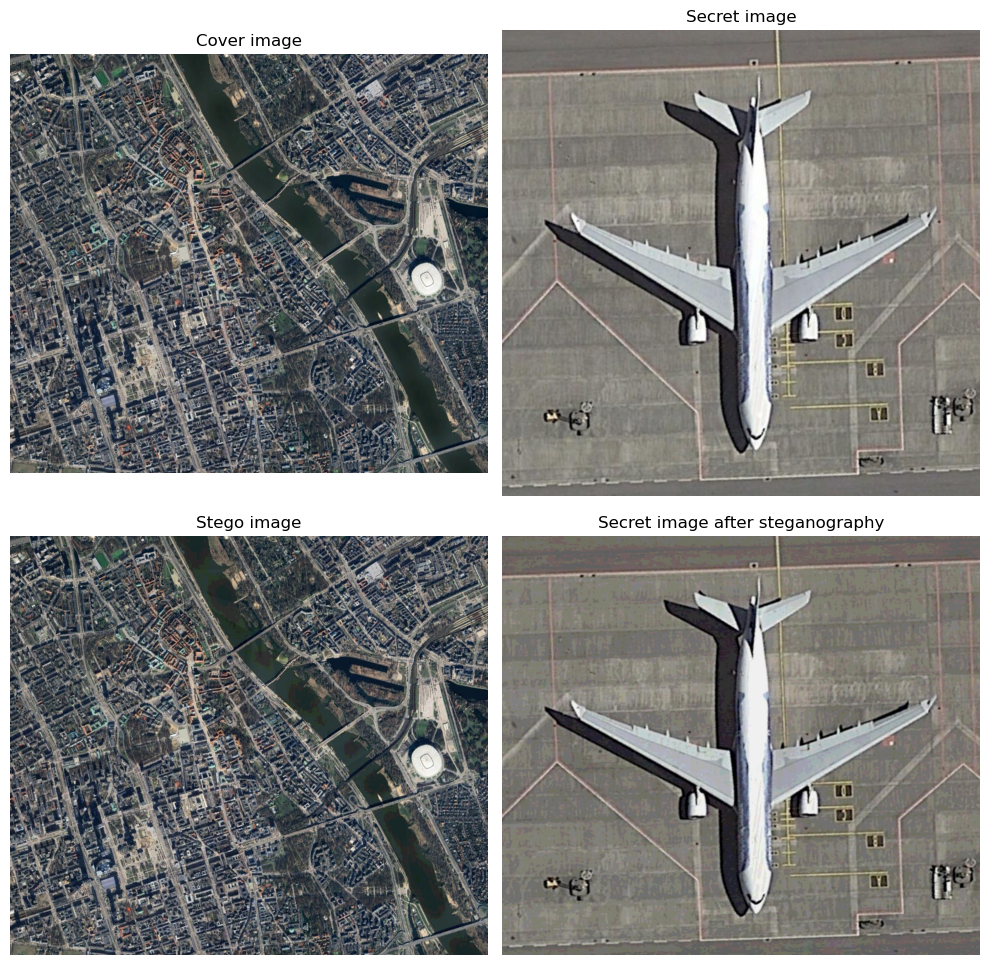

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(cover)
plt.title('Cover image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(secret)
plt.title('Secret image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(stego)
plt.title('Stego image')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(secret_out)
plt.title('Secret image after steganography')
plt.axis('off')

plt.tight_layout()